<a href="https://colab.research.google.com/github/dlagur/rep4DL/blob/main/DL_Using_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import keras
from keras.datasets import boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()
x_train[1], y_train[1]

65536/57026 [==================================] - 0s 0us/step


(array([2.1770e-02, 8.2500e+01, 2.0300e+00, 0.0000e+00, 4.1500e-01,
        7.6100e+00, 1.5700e+01, 6.2700e+00, 2.0000e+00, 3.4800e+02,
        1.4700e+01, 3.9538e+02, 3.1100e+00]), 42.3)

In [3]:
print(type(x_train),
      'training data:', x_train.shape,
      'test data:', x_test.shape)

<class 'numpy.ndarray'> training data: (404, 13) test data: (102, 13)


In [8]:
x_train

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [12]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM',
                'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
                'LSTAT']
key = ['Per capita crime rate.',
       'The proportion of residential land zoned for lots over 25,000 square feet.',
       'The proportion of non-retail business acres per town',
       'Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
       'Nitric oxides concentration(parts per 10 million)',
       'The average number of rooms per dwelling',
       'The proportion of owner-occupied units built before 1940',
       'Weighted distances to five Boston employment centers',
       'Index of accessibility to radial highways',
       'Full Value property tax rate per $10,000',
       'Pupil-Teacher ratio by town',
       '1000*(Bk-0.63)**2 where Bk is the proportion of Black people by town',
       'Percentage lower status of the population',
       'Median value of owner-occupied homes in $1,000\'s']

In [13]:
import pandas as pd

df = pd.DataFrame(x_train, columns=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [14]:
# 특징별 표준화
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std
print(x_train[0]) #표준화된 첫 번째 샘플

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]


## 모델 생성


In [20]:
from keras.layers import Dense, Dropout
from keras.models import Sequential

model = Sequential()
model.add(Dense(26, activation='relu', input_shape=(13, )))
model.add(Dense(26, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1))

In [21]:
from keras import optimizers

model.compile(optimizer='rmsprop',
              loss='mse', # 평균 제곱 오차
              metrics='mae') # 평균 절댓값 오차

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 26)                364       
                                                                 
 dense_5 (Dense)             (None, 26)                702       
                                                                 
 dense_6 (Dense)             (None, 12)                324       
                                                                 
 dense_7 (Dense)             (None, 1)                 13        
                                                                 
Total params: 1,403
Trainable params: 1,403
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
41/41 [==============================] - 1s 7ms/step - loss: 501.9814 - mae: 20.4850 - val_loss: 426.1708 - val_mae: 18.6637
Epoch 2/20
41/41 [==============================] - 0s 3ms/step - loss: 291.6733 - mae: 14.7495 - val_loss: 190.2628 - val_mae: 11.4374
Epoch 3/20
41/41 [==============================] - 0s 3ms/step - loss: 115.5596 - mae: 7.9653 - val_loss: 91.0756 - val_mae: 7.4025
Epoch 4/20
41/41 [==============================] - 0s 3ms/step - loss: 65.8558 - mae: 5.7542 - val_loss: 60.1473 - val_mae: 5.9862
Epoch 5/20
41/41 [==============================] - 0s 3ms/step - loss: 43.0565 - mae: 4.6131 - val_loss: 41.6245 - val_mae: 4.9960
Epoch 6/20
41/41 [==============================] - 0s 3ms/step - loss: 28.5086 - mae: 3.7496 - val_loss: 29.3163 - val_mae: 4.1890
Epoch 7/20
41/41 [==============================] - 0s 3ms/step - loss: 22.0714 - mae: 3.2042 - val_loss: 26.0823 - val_mae: 3.7490
Epoch 8/20
41/41 [==============================] - 0s 3ms/step - l

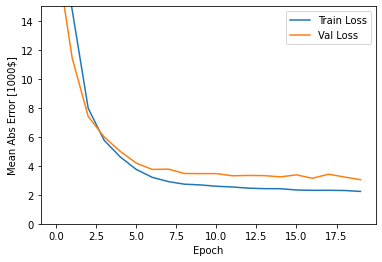

In [22]:
network_metadata = model.fit(x_train, y_train,
                             validation_data=(x_test, y_test),
                             epochs=20, batch_size=10)
import matplotlib.pyplot as plt
import numpy as np

def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [1000$]')
    plt.plot(history.epoch,
             np.array(history.history['mae']),
             label='Train Loss')
    plt.plot(history.epoch,
             np.array(history.history['val_mae']),
             label='Val Loss')
    plt.legend()
    plt.ylim([0,15])

plot_history(network_metadata)

## 주택 가격 예측

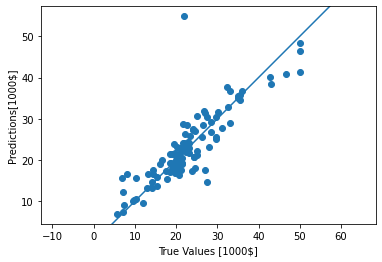

In [23]:
test_predictions = model.predict(x_test).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [1000$]')
plt.ylabel('Predictions[1000$]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])

 -> 최적 적합 직선과 예측값의 위치를 확인.

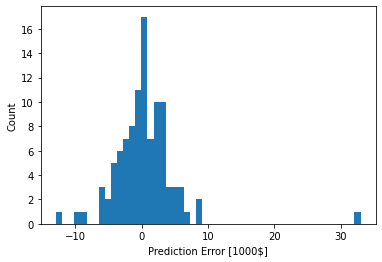

In [24]:
# 예측 오차 분포
error = test_predictions - y_test
plt.hist(error, bins=50)
plt.xlabel('Prediction Error [1000$]')
_ = plt.ylabel('Count')

-> 모델이 일부 주택 가격을 너무 낮거나 높게 평가한 모습을 확인할 수 있다. 

## K-fold cross validation

In [25]:
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from keras.datasets import boston_housing

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()
x_train.shape, x_test.shape

((404, 13), (102, 13))

In [26]:
import numpy as np
x_train = np.concatenate((x_train, x_test), axis=0)
y_train = np.concatenate((y_train, y_test), axis=0)

x_train.shape, y_train.shape

((506, 13), (506,))

In [27]:
def baseline_model():
    model = Sequential()
    model.add(Dense(13, input_dim=13, kernel_initializer='normal',
                    activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mse', optimizer='adam')
    return model

In [34]:
# 훈련 재현용 난수 시드 설정
seed = 7
np.random.seed(seed)

# 데이터에 Scaler, KerasReprogressor 추가
# estimator 목록에 모델 함수를 포함하는 스케일러와 케라스 회귀자를 추가

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)))

# 사이킷 런 파이프라인에 추정자를 추가한다
pipeline = Pipeline(estimators)

# 사이킷 런 API를 사용해 k-폴드 검증 인스턴스 초기화
kfold = KFold(n_splits=5, random_state=seed, shuffle=True)

# 파이프라인 인스턴스, 훈련 데이터 및 훈련 라벨, k-폴드 교차 검증자
# 인스턴스를 전달해서 점수 계산
results = cross_val_score(pipeline, x_train, y_train, cv=kfold)

# 평가한 모델 이름 출력
#print('Model Type:', i)

#결과 변수는 5번의 교차 검증 수행별 평균 제곱 오차를 포함
print('MSE per fold:')
print(results)

#5개의 폴드에 대해 모델별로 평균과 표준편차 출력
print('Average MSE of all 5 runs: %.2f, with standard dev: (%.2f)' % (-1 * (results.mean()), # 사이킷 런이 제공하는 통합 점수 API가 항상 입력된 점수를 최대화하려 하기 때문
                                                                      results.std()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  # Remove the CWD from sys.path while we load stuff.


MSE per fold:
[-18.60105705 -12.03145409 -15.52665329  -8.14354897 -19.84885216]
Average MSE of all 5 runs: 14.83, with standard dev: (4.30)
